# **Drug Target Interaction Prediction**

Author: Anamika Yadav

In this tutorial, we'll walk you through the use of deep learning to predict Drug Target Interaction between a protein drug target and a small molecule(drug). This tutorial is based on the model [ConPLeX](https://github.com/samsledje/ConPLex_dev) published in the
paper [Contrastive learning in protein language space predicts interactions between drugs and protein targets
](https://www.pnas.org/doi/10.1073/pnas.2220778120)  

## Table of Contents:
* [Introduction](#introduction)
  * [Drug Target Interaction](#ps)
  * [Types of Drug Target Interaction ](#ss)
  * [IMportance of Drug Target Interaction](#ts)
* [Drug Target Interaction Prediction](#ESM)
* [Select Targets based on DTI](#mESM)



## **Introduction**

Drug-target interaction (DTI) refers to the biological interaction between a drug (chemical compound) and its target (typically a protein or receptor in the body). Understanding these interactions is crucial for drug discovery and development, as the drug must bind to a specific target to produce a therapeutic effect.

A **target** is typically a protein, such as an enzyme, receptor, ion channel, or transporter, that plays a crucial role in a disease process. By modulating the activity of this target, a drug can alter the disease’s progression. Targets are often selected based on their involvement in critical biological pathways or disease mechanisms. For example, in cancer treatment, key targets may include proteins like kinases that are involved in cell growth and division.

A **drug** is a small molecule or biologic (such as an antibody) designed to interact with the target, either activating or inhibiting its function. The drug’s effectiveness depends on its ability to specifically bind to the target and influence its biological activity. Drug-target interactions are categorized as agonists, which activate the target, antagonists, which block the target's activity, or inhibitors, which often block enzyme activity, as seen in many cancer therapies that inhibit abnormal enzymes.

The **binding mechanism** of a drug involves two key factors: **affinity**, which refers to the strength of the interaction between the drug and its target, and **selectivity**, which describes how specifically the drug binds to its intended target compared to other proteins. High affinity often means the drug is more effective at lower doses, while high selectivity minimizes side effects by reducing off-target interactions.

The ultimate goal of drug-target interactions is to modulate biological functions in a way that treats or prevents disease.



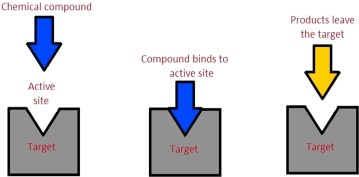

Fig. 1. The process of drug target interaction.([source](https://www.sciencedirect.com/science/article/pii/S1532046419300772#:~:text=Abstract,as%20well%20as%20time%20consuming.))

The image illustrates the process of a chemical compound interacting with a biological target (likely a protein or enzyme). In the first step, the compound approaches the active site of the target. In the second step, the compound binds to the active site, initiating the interaction. In the final step, products are released from the target after the compound's action, indicating that the interaction has occurred, possibly leading to a biochemical reaction or modulation of the target's function.


**Types of Drug Target Interactions**

**Agonists**: Agonists are molecules that bind to a receptor(target) on the surface of a cell or within a cell and activate it. This mimics the action of a naturally occurring molecule (called a ligand), leading to the receptor’s activation.
When the agonist binds to the receptor, it triggers a conformational change in the receptor, which typically leads to the receptor interacting with intracellular signaling molecules, causing a biological effect. For instance, opioid drugs bind to opioid receptors and activate them to provide pain relief.

**Antagonists**: Antagonists are molecules that bind to a receptor but do not activate it. Instead, they block the receptor, preventing a natural ligand (agonist) from binding and activating the receptor.
This inhibits the natural biological response. Antagonists are often used when excessive receptor activation is causing problems, such as in high blood pressure.For example, beta-blockers inhibit beta-adrenergic receptors to reduce blood pressure.

**Inhibitors**: nhibitors target enzymes rather than receptors. Enzymes catalyze chemical reactions in cells, and inhibitors block these enzymes, preventing them from carrying out their function.
This mechanism is crucial in stopping unwanted cellular processes, such as the uncontrolled growth of cancer cells. By inhibiting enzymes that promote cell division, inhibitors can slow or stop tumor progression. Many cancer therapies use kinase inhibitors to block abnormal signaling pathways that promote tumor growth.

Affinity and selectivity are two crucial concepts in Drug-Target Interactions (DTI) that determine how effectively a drug interacts with its target and how specific this interaction is.

**Affinity:** This refers to the strength of the interaction between a drug and its target. A drug with high affinity will bind effectively to its target even at low concentrations, which can lead to more efficient activation or inhibition of the target. This is often desirable as it allows lower doses of the drug to be used, minimizing side effects.


**Selectivity:** This describes how specifically a drug binds to its intended target. High selectivity means the drug primarily interacts with its target, while low selectivity implies the drug may bind to multiple targets, potentially causing off-target effects and side effects.

High affinity does not always mean high selectivity. A drug may bind strongly to its target (high affinity) but also to other similar proteins (low selectivity), causing unintended effects.
In contrast, a drug with high selectivity will bind primarily to its intended target, even if the affinity is moderate. High selectivity is often a key goal in drug development to ensure that the drug works effectively on the target with minimal interactions with other molecules.


**Importance of Drug-Target Interactions:**

**Therapeutic Effect:** The primary goal of drug-target interactions is to modulate the biological function of the target to treat or prevent disease. For example, statins reduce cholesterol levels by inhibiting the enzyme HMG-CoA reductase.

**Side Effects:** Poor selectivity can lead to off-target interactions, which may result in side effects. For example, a cancer drug might target a protein in cancer cells but also affect similar proteins in healthy cells, causing toxicity.

**Drug Discovery and Development:** Identifying drug-target interactions is a fundamental step in drug discovery. Researchers use computational tools (e.g., virtual screening) and laboratory methods to identify compounds that interact with disease-related targets. Once these interactions are identified, the compounds are optimized for efficacy and selectivity before progressing to clinical trials.

## **Drug Target Interaction Prediction**

For predicting Drug Target Interaction we'll use [ConPLex](https://github.com/samsledje/ConPLex_dev), a deep learning model that leverages pretrained protein language models (PLMs) and employs a protein-anchored contrastive co-embedding to predict drug-target interactions (DTIs). It enables predictions of binding based on the distance between learned representations, facilitating predictions at the scale of massive compound libraries and the human proteome. The approach is also interpretable, allowing visualization of the drug–target embedding space and characterization of the function of human cell-surface proteins.

Before we dive into predicting DTI with Conplex, let's understand how exactly Conplex works.

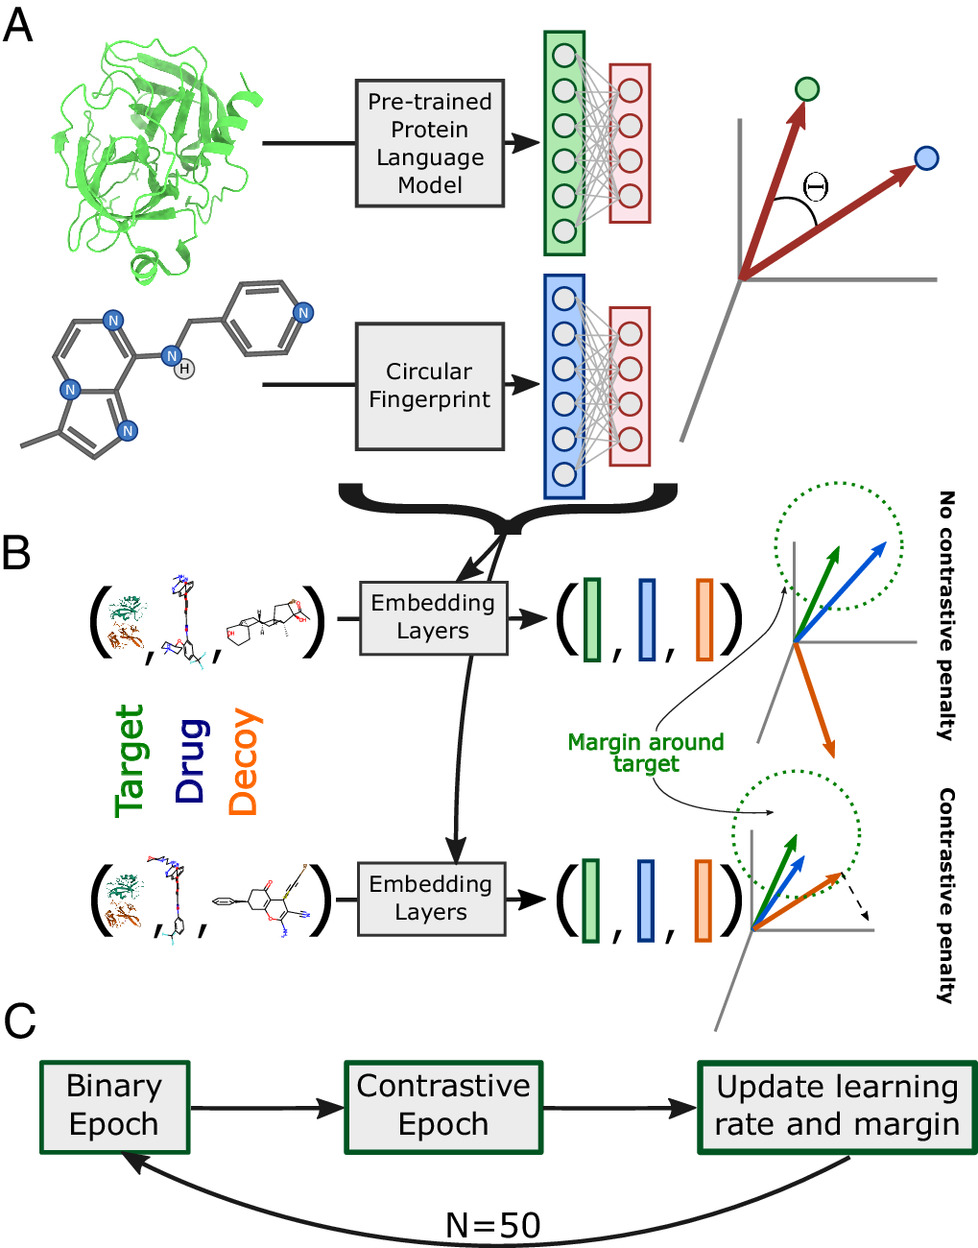

*Fig 1: Outline of the ConPLex model architecture and training framework. ConPLex is trained in two phases, to optimize both generalizability and specificity. (A) Protein features are generated using a pretrained PLM [here ProtBert (27)], and drug features are generated using the Morgan fingerprint (26). These features are transformed into a shared latent space by a learned nonlinear projection. The prediction of interaction is based on the cosine distance in this space, and the parameters of the transformation are updated using the binary cross-entropy on a low-coverage dataset. (B) In the contrastive phase, triplets of a target, drug, and decoy are transformed in the same way into the shared space. Here, the transformation is treated as a metric learning problem. Parameters are updated using the triplet distance loss on a high-coverage dataset (36) to minimize the target-drug distance while maximizing the target-decoy distance. No additional penalty is applied if the target-decoy distance is greater than the target-drug distance plus some margin. (C) ConPLex is trained in alternating epochs of the binary and contrastive phase to simultaneously optimize both objectives. After each round, learning rates and the contrastive margin are updated according to an annealing scheme.*

### **Install Dependencies and Download Datasets**

In [25]:
# !pip install conplex-dti

In [26]:
# !git clone https://github.com/samsledje/ConPLex.git

In [27]:
# %cd ConPLex
# !conplex-dti download --to datasets --benchmarks davis bindingdb biosnap biosnap_prot biosnap_mol dude
# !conplex-dti download --to . --models ConPLex_v1_BindingDB
# !conplex-dti predict --data-file ./data.tsv --model-path ./models/ConPLex_v1_BindingDB.pt --outfile ./results.tsv

### **Steps to calculate DTI score with pre-trained model in the [paper](https://www.pnas.org/doi/10.1073/pnas.2220778120):**


1. Tokenise the target protein with protBERT
2. Tokenise the drug compound to SMILES
3. Generate a co-embedding
4. Use pretrained model to calculate the DTI


For demontration let's take an example

In [28]:
# Target: Acetylcholinesterase (AChE)
protein_id = 'P22303'
protein = 'MALWMRLLPLLALLALWGPDPAAAFRAVYFQGQYVTDYVQQDLPQKVDLTPWQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPL'
# Drug: Donepezil
smile_id = 'PubChem3152'
smile = 'CN1CCN(CC1)CC2=CC=CC3=C2C=CC(=C3)OCC4CC5CC(CC4)O5'


### **Generate Protein embedding**

**Protein featurisation based on Protein Language Model**

Protein language models are deep learning models that leverage the principles of natural language processing (NLP) to analyze and understand the complex patterns and relationships within protein sequences. These models are trained on vast protein sequence datasets and can learn to extract meaningful representations of proteins through self-supervised masking tasks. The key differences between protein language models and traditional large language models lie in their input data and intended applications. While large language models are trained on massive textual datasets, protein language models harness vast protein sequence databases containing millions of amino acid sequences from various organisms

ProtBERT is a pre-trained language model designed specifically for protein sequences. It is based on the BERT model but is trained on a large corpus of protein sequences using a masked language modeling (MLM) objective. This means that it was trained on raw protein sequences without any human labeling, using an automatic process to generate inputs and labels from those sequences


**Here's how it works:**

1. Pretraining: ProtBERT is based on the BERT model, which is pre-trained on a large corpus of protein sequences. This means that the model is trained on raw protein sequences without any human labeling, using an automatic process to generate inputs and labels from those sequences.
2. Masked Language Modeling: During training, 15% of the amino acids in the input sequences are randomly masked. This helps the model learn to predict the missing amino acids based on the context, which is useful for capturing complex sequence patterns and biological features.
3. Feature Extraction: The model generates features by encoding the input protein sequences into a fixed-size vector. This vector captures the intricate relationships between amino acids in the protein, including spatial and sequential dependencies. These features can be used for various downstream tasks such as protein sequence classification, protein structure and function prediction, and drug-target interaction prediction.
4. Fine-Tuning: ProtBERT can be fine-tuned for specific tasks by adjusting the model's parameters to better fit the task at hand. This involves training the model on a labeled dataset related to the task, which helps the model learn task-specific features and improve its performance


In [29]:
import torch
from transformers import BertTokenizer, BertModel
import re

# Load the pre-trained ProtBERT model
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Load the pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)

# Preprocess the protein sequence
sequence = re.sub(r"[UZOB]", "X", protein)
print(sequence)

# Tokenize the sequence
encoded_input = tokenizer(sequence, return_tensors='pt')

# Get the embeddings
output = model(**encoded_input)

# Extract the embeddings
protien_embedding = output.last_hidden_state
seq_len = len(sequence)
start_Idx = 1
end_Idx = seq_len + 1
protien_embedding = protien_embedding.squeeze()[start_Idx:end_Idx]
protien_embedding = protien_embedding.mean(0)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


MALWMRLLPLLALLALWGPDPAAAFRAVYFQGQYVTDYVQQDLPQKVDLTPWQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPLVQKFLGQFLGIGYVYAGLISNPL


In [30]:
print(f"protien embedding shape: {protien_embedding.shape}")

protien embedding shape: torch.Size([1024])


### **Generate smiles Embedding**


**Smiles featursation with morgan finger print**

A Morgan fingerprint is a type of molecular fingerprint used in cheminformatics and bioinformatics to represent the chemical structure of a molecule. It is a fixed-length binary vector that captures the presence or absence of specific substructures within a molecule. The fingerprint is generated by traversing the molecule and recording the presence of certain substructures, such as atom pairs, rings, or functional groups, up to a certain radius or distance from a central atom.

**Key Features of Morgan Fingerprint**
1. Fixed-Length Binary Vector: Morgan fingerprints are binary vectors of a fixed length, typically 2048 bits. This fixed length allows for efficient storage and comparison of fingerprints

2. Substructure Encoding: The fingerprint encodes the presence or absence of specific substructures within a molecule. These substructures can include atom pairs, rings, functional groups, and other chemical features

3. Radius: The radius of the Morgan fingerprint determines the distance from the central atom up to which substructures are considered. This allows for varying levels of detail in the fingerprint, with higher radii capturing more complex substructures


In [31]:
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

def canonicalize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(mol, isomericSmiles=True)
    else:
        return None

def smiles_to_morgan(smile: str):
    """
    Convert smiles into Morgan Fingerprint.
    :param smile: SMILES string
    :type smile: str
    :return: Morgan fingerprint
    :rtype: np.ndarray
    """
    shape: int = 2048
    radius: int = 2
    smile = canonicalize(smile)
    mol = Chem.MolFromSmiles(smile)
    features_vec = AllChem.GetMorganFingerprintAsBitVect(
        mol, radius, nBits=shape)
    features = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(features_vec, features)
    return features

def transform(smile: str) -> torch.Tensor:
    shape: int = 2048
    feats = torch.from_numpy(smiles_to_morgan(smile)).squeeze().float()
    return feats

In [32]:
smile_embedding = transform(smile)


### **Generate Co-embedding**

**Shared Feature space generation**

Given  a  target embedding $T∈R^dt$ and small molecule embedding $M∈R^dm$, we transform them separately into $T^∗, M^∗∈R^h$ using a single fully connected layer witha ReLU activation. These layers are parameterized with weight matricesWt∈Rh×dt, Wm∈Rh×dm, and bias vectorsbt, bm∈Rh.

$T^∗=ReLU(W^tT+b^t)$        ---------[1]

$M^∗=ReLU(W^mM+b^m)$        ---------[2]

Given  the  latent  embeddings $T^∗$, $M^∗$,  we  compute  the  probability  of  a  DTI  $ p(T∗, M∗)$ as the cosine similarity between the embedding vectors, followed bya sigmoid activation. Thus, we compute the predicted probability as:

$p(T^∗, M^∗) =σ(T^∗·M^∗/(||T^∗||2·||M^∗||2))$     ---------[3]

When  predicting  compound  binding  affinity $y(T^∗, M^∗)$,  we  substitute  the sigmoid  and  cosine  similarity  (Eq.3)  with  a  dot  product  followed  by  a  ReLU activation, which gives a non negative distance in the embedding space (Eq.4).

$y(T^∗, M^∗) =ReLU(T^∗·M^∗)$-----------[4]



In [33]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

class Cosine(nn.Module):
    def forward(self, x1, x2):
        return nn.CosineSimilarity()(x1, x2)


class SquaredCosine(nn.Module):
    def forward(self, x1, x2):
        return nn.CosineSimilarity()(x1, x2) ** 2


class Euclidean(nn.Module):
    def forward(self, x1, x2):
        return torch.cdist(x1, x2, p=2.0)


class SquaredEuclidean(nn.Module):
    def forward(self, x1, x2):
        return torch.cdist(x1, x2, p=2.0) ** 2


DISTANCE_METRICS = {
    "Cosine": Cosine,
    "SquaredCosine": SquaredCosine,
    "Euclidean": Euclidean,
    "SquaredEuclidean": SquaredEuclidean,
}

class SimpleCoembeddingSigmoid(nn.Module):
    def __init__(
        self,
        drug_shape=2048,
        target_shape=1024,
        latent_dimension=1024,
        latent_activation=nn.ReLU,
        latent_distance="Cosine",
        classify=True,
    ):
        super().__init__()
        self.drug_shape = drug_shape
        self.target_shape = target_shape
        self.latent_dimension = latent_dimension
        self.do_classify = classify

        self.drug_projector = nn.Sequential(
            nn.Linear(self.drug_shape, latent_dimension), latent_activation()
        )
        nn.init.xavier_normal_(self.drug_projector[0].weight)

        self.target_projector = nn.Sequential(
            nn.Linear(self.target_shape, latent_dimension), latent_activation()
        )
        nn.init.xavier_normal_(self.target_projector[0].weight)

        if self.do_classify:
            self.distance_metric = latent_distance
            self.activator = DISTANCE_METRICS[self.distance_metric]()

    def forward(self, drug, target):
        if self.do_classify:
            return self.classify(drug, target)
        else:
            return self.regress(drug, target)

    def regress(self, drug, target):
        drug_projection = self.drug_projector(drug)
        target_projection = self.target_projector(target)

        inner_prod = torch.bmm(
            drug_projection.view(-1, 1, self.latent_dimension),
            target_projection.view(-1, self.latent_dimension, 1),
        ).squeeze()
        relu_f = torch.nn.ReLU()
        return relu_f(inner_prod).squeeze()

    def classify(self, drug, target):
        drug_projection = self.drug_projector(drug)
        target_projection = self.target_projector(target)

        distance = self.activator(drug_projection, target_projection)
        sigmoid_f = torch.nn.Sigmoid()
        return sigmoid_f(distance).squeeze()

### **Predict the DTI**

**Initialise the model**

In [34]:
model = SimpleCoembeddingSigmoid()

In [35]:
model_path = './models/ConPLex_v1_BindingDB.pt'
device = torch.device("cpu")
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.eval()
model = model.to(device)

<ipython-input-35-4bf433e4f285>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


**Load the data**

In [36]:
data = (smile_embedding, protien_embedding)
dt_feature_pairs= [data]
dloader = DataLoader(dt_feature_pairs, batch_size=32, shuffle=False)


In [37]:
preds = []
with torch.set_grad_enabled(False):
        for b in dloader:
            preds.append(model(b[0], b[1]).detach().cpu().numpy())

In [38]:
print('DTI score b\w protein and smile ', smile, ' is ', preds[0])

DTI score b\w protein and smile  CN1CCN(CC1)CC2=CC=CC3=C2C=CC(=C3)OCC4CC5CC(CC4)O5  is  0.5158956


## **Select Targets based on DTI**




When selecting drug targets based on Drug-Target Interactions (DTI), the scores derived from DTI models or docking simulations are crucial. These scores typically represent the strength or likelihood of interaction between a drug (ligand) and a protein target. Here's how you can refine and interpret these scores for selecting the best drug targets:

**Score Interpretation**

1. **Higher Scores:** A higher score often indicates a stronger or more favorable interaction. This suggests the drug binds well to the target, leading to a higher likelihood of inhibition or activation of the target.
  - Strong Binding: Indicates good complementarity between the drug and the active or binding site of the target protein.

  -  Increased Affinity: Often correlates with increased inhibition or modulation of the target, making the protein a more attractive target for drug development.

2. **Lower Scores:** These suggest weaker interactions between the drug and the target, indicating that the drug may not bind effectively to the protein, making it a less favorable target.
  - Weak Binding: The drug may not sufficiently occupy the target's active site, reducing its therapeutic effect.
  - Lower Likelihood of Modulation: The target might not be strongly affected by the drug, reducing its potential as a viable therapeutic target.


**Prioritizing Targets Based on Scores**

After evaluating the DTI scores, it is essential to prioritize targets using a systematic approach. Here are some key considerations:

- Rank the Targets: Rank potential targets based on their DTI scores, giving priority to those with the highest (or most negative) scores that indicate stronger binding.
- Cutoff Thresholds: Set a threshold for what you consider a "strong" vs. "weak" interaction. For example:
- High-Scoring Targets: Focus on those above a certain threshold, suggesting potent binding.
- Low-Scoring Targets: Discard or deprioritize targets with scores below the threshold, as these may not be therapeutically effective.


**Other Factors to Consider Alongside DTI Scores**

While DTI scores are critical, other factors should be incorporated into the target selection process to ensure the best candidates are chosen:

**Biological Relevance:**
Ensure that high-scoring targets are biologically relevant to the disease pathway. High scores alone don’t guarantee a good target if the protein isn’t crucial to the disease.
Cross-reference DTI results with databases like UniProt, OMIM, or MeSH to confirm the target’s disease association.

**Druggability:**
Use tools like SwissADME or DrugBank to assess the druggability of the protein target. High-scoring DTIs are only useful if the target has a druggable binding pocket or site.

**Selectivity:**
Prefer targets where the drug exhibits high selectivity, i.e., it binds to the target more strongly than to off-target proteins, reducing the risk of side effects.


# Congratulations! Time to join the Community!
Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:


## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/cGzwCdrUqS) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!

## Citing this Tutorial

If you found this tutorial useful, please consider citing it as:

```
@manual{Bioinformatics,
 title={Drug Target Interaction Prediction},
 organization={DeepChem},
 author={Yadav, Anamika },
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Drug_Target_Interaction_Prediction.ipynb}},
 year={2024},
}
```